In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sms

In [3]:
airline_data=pd.read_csv('airline_passengers.csv')

In [4]:
airline_data.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [5]:
airline_data.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [11]:
airline_data[airline_data['Thousands of Passengers'].isnull()]

,Month,Thousands of Passengers
144,International airline passengers: monthly tota...,NaN


In [12]:
airline_data.dropna(axis=0,inplace=True)

In [13]:
airline_data.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [16]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [15]:
airline_data['Month']=pd.to_datetime(airline_data['Month'])

In [20]:
airline_data.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [19]:
airline_data.set_index('Month',inplace=True)

<AxesSubplot:xlabel='Month'>

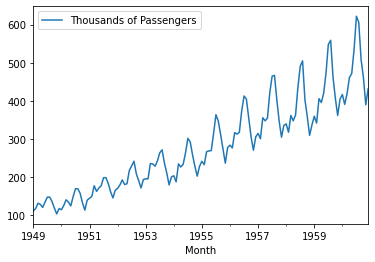

In [21]:
airline_data.plot()

In [22]:
from statsmodels.tsa.stattools import adfuller

In [26]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if(result[1]<=0.05):
        print("Reject null hypothesis, having stationary data")
    else:
        print("Accept null hypothesis, no stationary data ")

In [27]:
adf_test(airline_data['Thousands of Passengers'])

ADF Statistics: 0.8153688792060463
p-value: 0.991880243437641
Accept null hypothesis, no stationary data 


## Use Technique differencing

In [28]:
airline_data['First Diff']=airline_data['Thousands of Passengers']-airline_data['Thousands of Passengers'].shift(1)

In [29]:
airline_data.head()

,Thousands of Passengers,First Diff
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [30]:
adf_test(airline_data['First Diff'].dropna())

ADF Statistics: -2.8292668241699923
p-value: 0.054213290283826474
Accept null hypothesis, no stationary data 


In [33]:
airline_data['Second Diff']=airline_data['First Diff']-airline_data['First Diff'].shift(1)

In [34]:
airline_data.head()

,Thousands of Passengers,First Diff,Second Diff
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [35]:
adf_test(airline_data['Second Diff'].dropna())

ADF Statistics: -16.384231542468516
p-value: 2.7328918500141235e-29
Reject null hypothesis, having stationary data


In [36]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

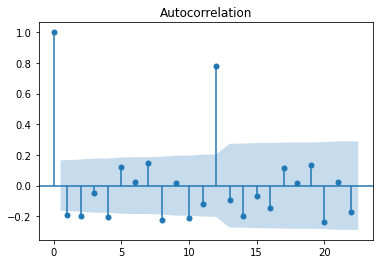

In [37]:
acf=plot_acf(airline_data['Second Diff'].dropna())

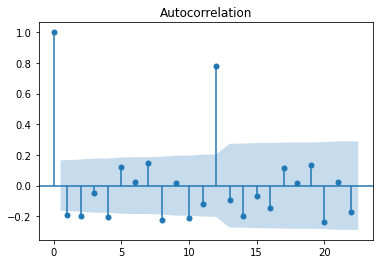

In [39]:
acf

C:\Users\Amar\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


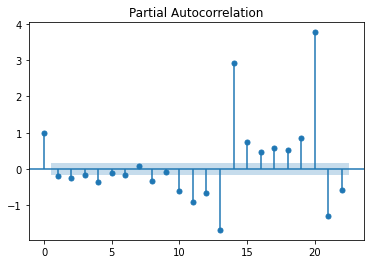

In [38]:
pacf=plot_pacf(airline_data['Second Diff'].dropna())

In [40]:
## split train and test data

from datetime import datetime,timedelta
train_data_end=datetime(1955,12,1)
test_data_end=datetime(1960,12,1)

In [41]:
train_data=airline_data[:train_data_end]
test_data=airline_data[train_data_end+timedelta(days=1):test_data_end]

In [42]:
## prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [43]:
test_data

,Thousands of Passengers,First Diff,Second Diff
Month,,,
1956-01-01,284.0,6.0,-35.0
1956-02-01,277.0,-7.0,-13.0
1956-03-01,317.0,40.0,47.0
1956-04-01,313.0,-4.0,-44.0
1956-05-01,318.0,5.0,9.0
1956-06-01,374.0,56.0,51.0
1956-07-01,413.0,39.0,-17.0
1956-08-01,405.0,-8.0,-47.0
1956-09-01,355.0,-50.0,-42.0


In [44]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [45]:
train_data

,Thousands of Passengers,First Diff,Second Diff
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0
...,...,...,...
1955-08-01,347.0,-17.0,-66.0
1955-09-01,312.0,-35.0,-18.0
1955-10-01,274.0,-38.0,-3.0


In [48]:
model=ARIMA(airline_data['Thousands of Passengers'],order=(10,2,0))

C:\Users\Amar\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Amar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will

In [51]:
fit=model.fit()

In [52]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                  142
Model:                        ARIMA(10, 2, 0)   Log Likelihood                -661.051
Method:                               css-mle   S.D. of innovations             24.780
Date:                        Wed, 08 Jun 2022   AIC                           1346.101
Time:                                04:25:31   BIC                           1381.571
Sample:                            03-01-1949   HQIC                          1360.515
                                 - 12-01-1960                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0200      0.350      0.057      0.954      -0.666       0.706
ar.L1.D2.Thousands of Passengers     -0.3721      0.066     -5.662      0.000      -0.501      -0.243
ar.L2.D2.Thousands of Passengers     -0.7445      0.069    -10.731      0.000      -0.880      -0.609
ar.L3.D2.Thousands of Passengers     -0.3583      0.075     -4.796      0.000      -0.505      -0.212
ar.L4.D2.Thousands of Passengers     -0.7950      0.080     -9.952      0.000      -0.952      -0.638
ar.L5.D2.Thousands of Passengers     -0.3607      0.090     -4.013      0.000      -0.537      -0.185
ar.L6.D2.Thousands of Passengers     -0.6673      0.088     -7.569      0.000      -0.840      -0.495
ar.L7.D2.Thousands of Passengers     -0.2609      0.081     -3.220      0.001      -0.420      -0.102
ar.L8.D2.Thousands of Passengers     -0.6880      0.076     -9.051      0.000      -0.837      -0.539
ar.L9.D2.Thousands of Passengers     -0.2601      0.072     -3.590      0.000      -0.402      -0.118
ar.L10.D2.Thousands of Passengers    -0.6414      0.066     -9.667      0.000      -0.771      -0.511
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.8901           -0.5373j            1.0397           -0.0864
AR.2             0.8901           +0.5373j            1.0397            0.0864
AR.3             0.4938           -0.9038j            1.0299           -0.1704
AR.4             0.4938           +0.9038j            1.0299            0.1704
AR.5            -0.9235           -0.4485j            1.0267           -0.4280
AR.6            -0.9235           +0.4485j            1.0267            0.4280
AR.7            -0.5867           -0.8689j            1.0484           -0.3445
AR.8            -0.5867           +0.8689j            1.0484            0.3445
AR.9            -0.0765           -1.0806j            1.0833           -0.2612
AR.10           -0.0765           +1.0806j            1.0833            0.2612
------------------------------------------------------------------------------
"""

In [53]:
## prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [55]:
pred=fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [56]:
residuals

Month
1956-01-01    307.175456
1956-02-01    279.896391
1956-03-01    297.964791
1956-04-01    347.668047
1956-05-01    305.047015
1956-06-01    341.585009
1956-07-01    440.824234
1956-08-01    455.912335
1956-09-01    359.108154
1956-10-01    307.840764
1956-11-01    229.050354
1956-12-01    263.276424
1957-01-01    328.221598
1957-02-01    307.390749
1957-03-01    331.583347
1957-04-01    393.470757
1957-05-01    336.720468
1957-06-01    387.602218
1957-07-01    506.224798
1957-08-01    513.105374
1957-09-01    430.792703
1957-10-01    334.951156
1957-11-01    264.973018
1957-12-01    285.180808
1958-01-01    351.727924
1958-02-01    320.033602
1958-03-01    326.986037
1958-04-01    397.923543
1958-05-01    326.777281
1958-06-01    409.283414
1958-07-01    527.208148
1958-08-01    563.026531
1958-09-01    446.183834
1958-10-01    335.286681
1958-11-01    263.433675
1958-12-01    302.896915
1959-01-01    350.068826
1959-02-01    375.937205
1959-03-01    366.608985
1959-04-01    464.2

<AxesSubplot:ylabel='Density'>

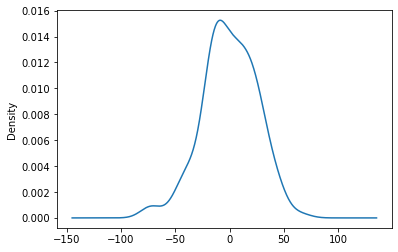

In [57]:
fit.resid.plot(kind='kde')